# Generate dummy marketing campaign data

Set the number of records; the idea is to find where the capacity of the procedures is.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Read in the offers data, originally from IBM and massaged. It gives the probability of taking an offer by each customer.

We have four product types:

  * car loan
  * savings
  * mortgage
  * pension
  
In the original IBM data, there was no data for car loans.

In [2]:
import pandas

product_probs = pandas.read_csv('offers_ibm_pivot.csv')
product_probs['Car loan'] = 0
product_probs = product_probs[['Car loan', 'Savings', 'Mortgage', 'Pension', 'customerid', 'name']]
product_probs.head()

,Car loan,Savings,Mortgage,Pension,customerid,name
0,0,0.28391,0.00000,0.80506,139068,Sandra J. Wynkoop
1,0,0.00000,0.10675,0.13221,139154,Roland Guérette
2,0,0.00000,0.10675,0.13221,139158,Fabien Mailhot
3,0,0.00000,0.10675,0.13221,139169,Christian Austerlitz
4,0,0.00000,0.10675,0.13221,139220,Steffen Meister


Plot a histogram of the probabilities by product.

### Savings

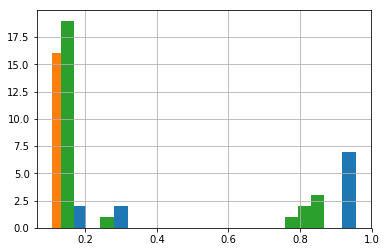

In [3]:
for i in ['Savings', 'Mortgage', 'Pension']:
    product_probs[product_probs[i] > 0][i].hist(bins=20)

### Generate random things

How many of each are non-zero?

In [4]:
product_probs.astype(bool).sum(axis=0)

Car loan       0
Savings       11
Mortgage      17
Pension       26
customerid    27
name          27
dtype: int64

In [39]:
from faker import Faker
numpy.random.seed(1435)

products = ['Car loan', 'Savings', 'Mortgage', 'Pension']
nonZero_probs = [0.2, 11/27, 17/27, 12/27]
mode_values = [0.5, 0.8, 0.2, 0.4]
n_obs = 10000

fake = Faker('en_AU')

sample_product = pandas.DataFrame(index=range(0, n_obs))
sample_product['name'] = sample_product.index.map(lambda x: fake.name())
for i in range(len(products)):
    sample_product[products[i]] = numpy.random.triangular(0, mode_values[i], 1, 
                                                         sample_product.shape[0])
    sample_product[products[i]] = numpy.where(numpy.random.uniform(size=sample_product.shape[0]) > nonZero_probs[i], 0, 
           sample_product[products[i]])

sample_product.head()

,name,Car loan,Savings,Mortgage,Pension
0,Matthew Harvey,0.000000,0.000000,0.000000,0.000000
1,Joshua Wilcox,0.000000,0.000000,0.179932,0.000000
2,Yolanda Vasquez,0.330731,0.580556,0.000000,0.000000
3,Jessica Alvarado,0.000000,0.630242,0.509746,0.000000
4,Gregory Martinez,0.000000,0.320511,0.000000,0.288832


In [40]:
sample_product.to_csv('sample_data_10000.csv')